# Week 3
# Aidin Attar - 2048654

### Table of contents:
- [Libraries](#lib)
- [Exercise 1 - Triangular distribution](#ex1)
- [Exercise 2 - Markov's inequality](#ex2)
- [Exercise 3 - Chebyshev's inequality](#ex3)
- [Exercise 4 - Six Boxes Toy Model: inference](#ex4)
- [Exercise 5 - Six Boxes Toy Model: simulation](#ex5)

## Libraries<a class="anchor" id="lib"></a>

In [1]:
library("triangle")
library("eList")


Attaching package: 'eList'


The following object is masked from 'package:utils':

    zip




## Exercise 1 - Triangular distribution<a class="anchor" id="ex1"></a>

In [2]:
dtriangular <- function(x, a=0, b=1, c=(a+b)/2){
    if(c<a || c>b){ stop("c should be inside [a,b]") }
    return(ifelse(x>=a && x< c, 2*(x-a)/(b-a)/(c-a),
           ifelse(x>=c && x<=b, 2*(b-x)/(b-a)/(b-c), 0)))
}

ptriangular <- function(x, a=0, b=1, c=(a+b)/2){
    if(c<a || c>b){ stop("c should be inside [a,b]") }
    return(ifelse(x>=a && x< c, (x-a)^2/(b-a)/(c-a),
           ifelse(x>=c && x<=b, 1-(b-x)^2/(b-a)/(b-c),
           ifelse(x<a, 0, 1))))
}

qtriangular <- function(p, a=0, b=1, c=(a+b)/2){
    if(c<a || c>b){ stop("c should be inside [a,b]") }

    return(ifelse(p<=(c-a)/(b-a), a+sqrt(p*(b-a)*(c-a)), b-sqrt((1-p)*(b-c)*(b-a))))
}

rtriangular <- function(N, a=0, b=1, c=(a+b)/2){
    us <- runif(N)
    return(sapply(us, qtriangular, a, b, c))
}

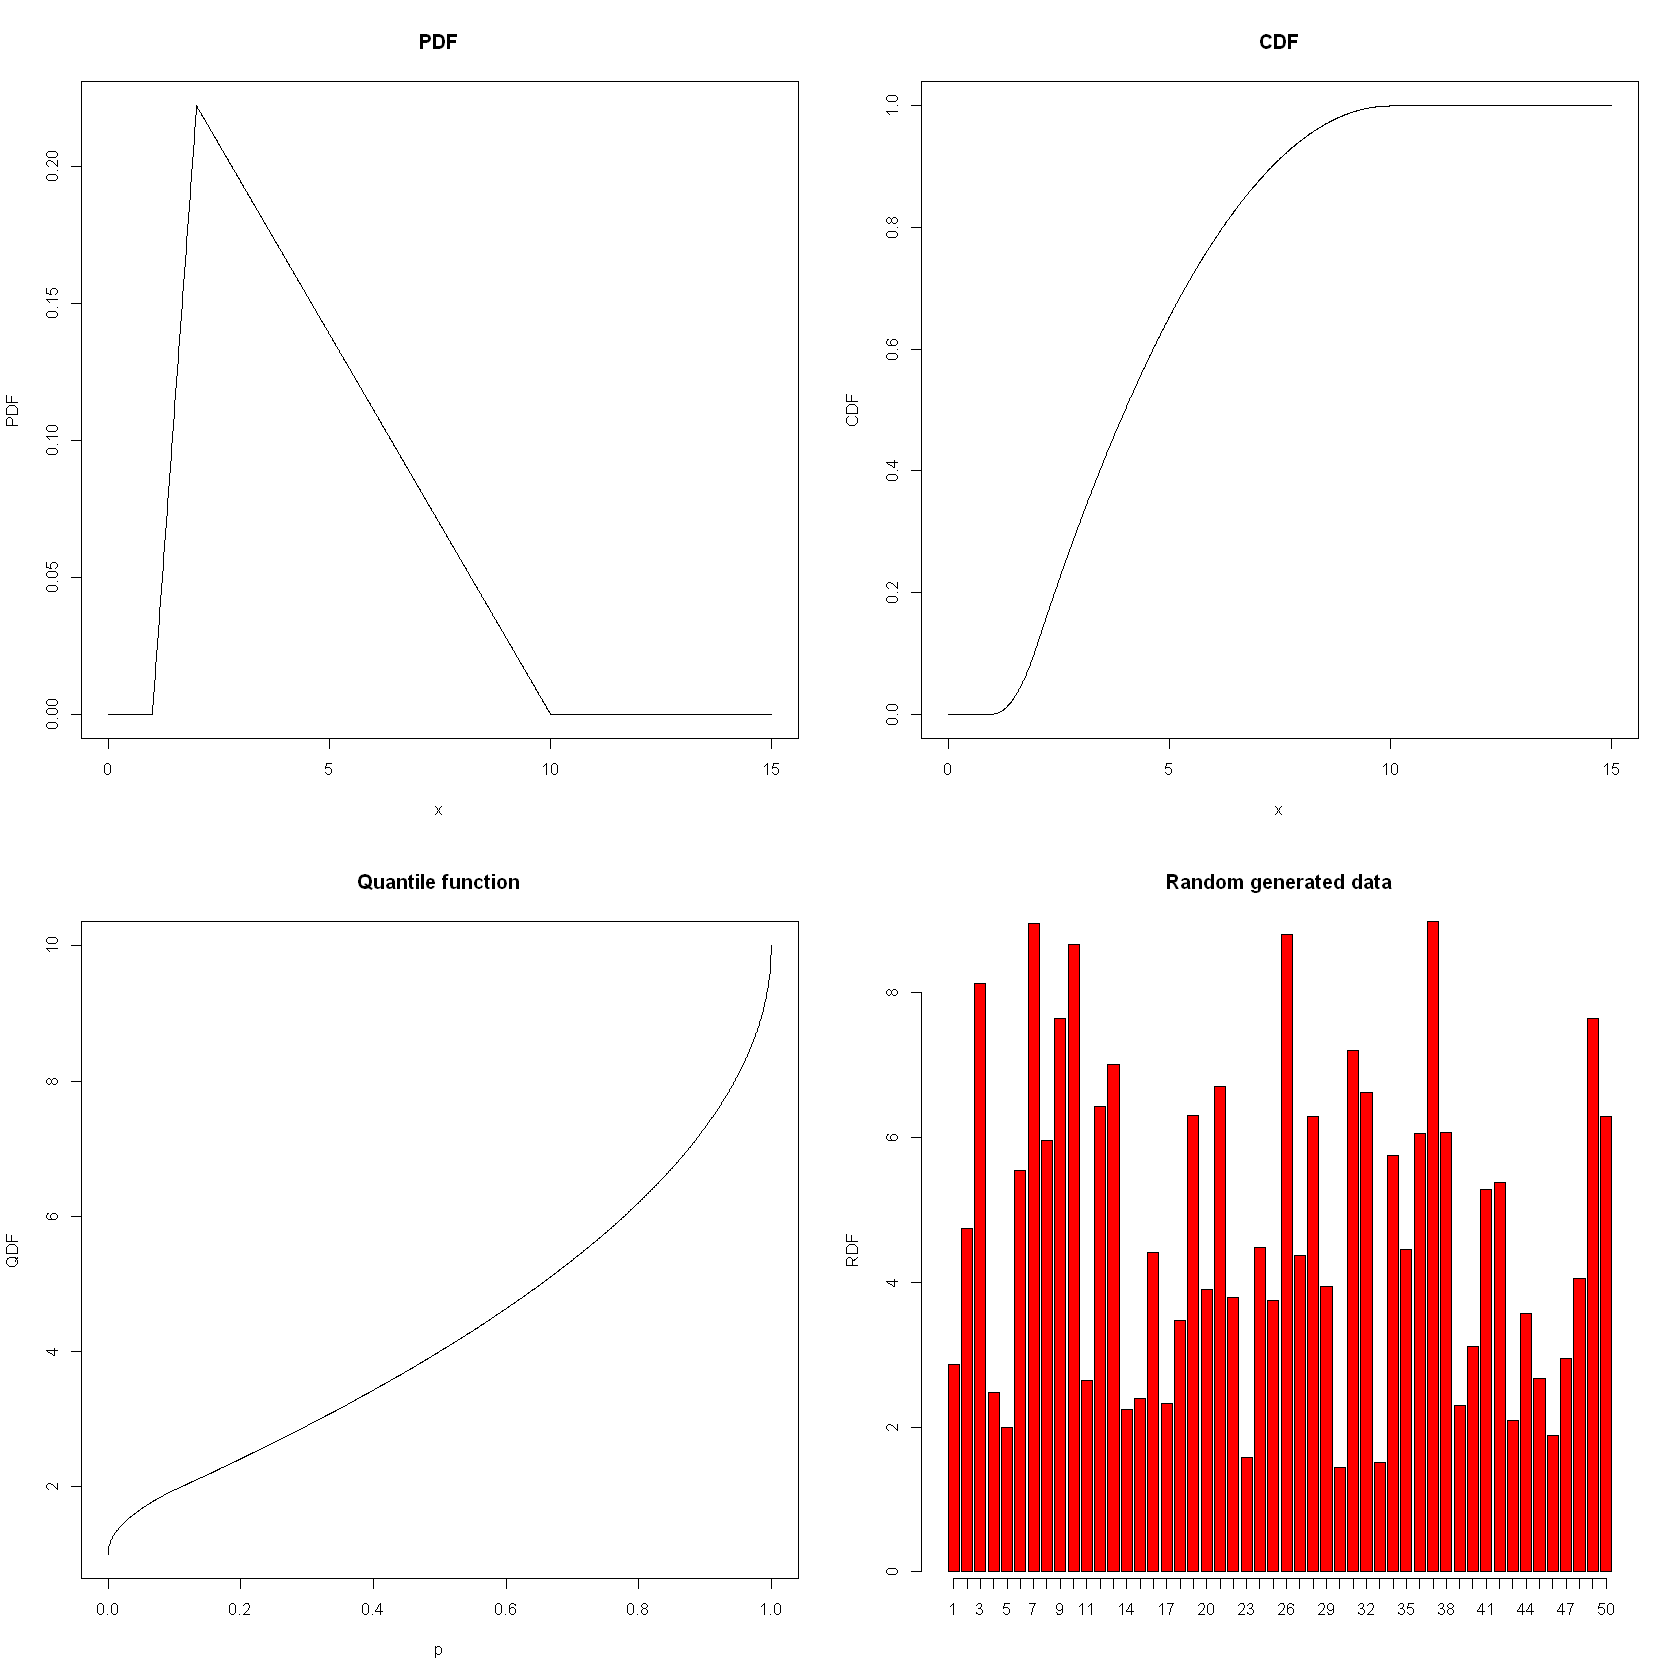

In [3]:
par(mfrow = c(2,2))
options(repr.plot.width = 14, repr.plot.height = 14)
x <- seq(0,15,.01)
plot(x, sapply(x, dtriangular, a=1, b=10, c=2), type='l', main='PDF', ylab = "PDF")
plot(x, sapply(x, ptriangular, a=1, b=10, c=2), type='l', main='CDF', ylab = "CDF")
p <- seq(0,1,.001) 
plot(p, sapply(p, qtriangular, a=1, b=10, c=2), type='l', main='Quantile function', ylab = "QDF")
N = 50
rdm = barplot(rtriangular(50, a=1, b=10, c=2), main='Random generated data', ylab = "RDF", col="red")
axis(1,at=rdm,labels = 1:50)

### Comparison with the results of the library "triangle"

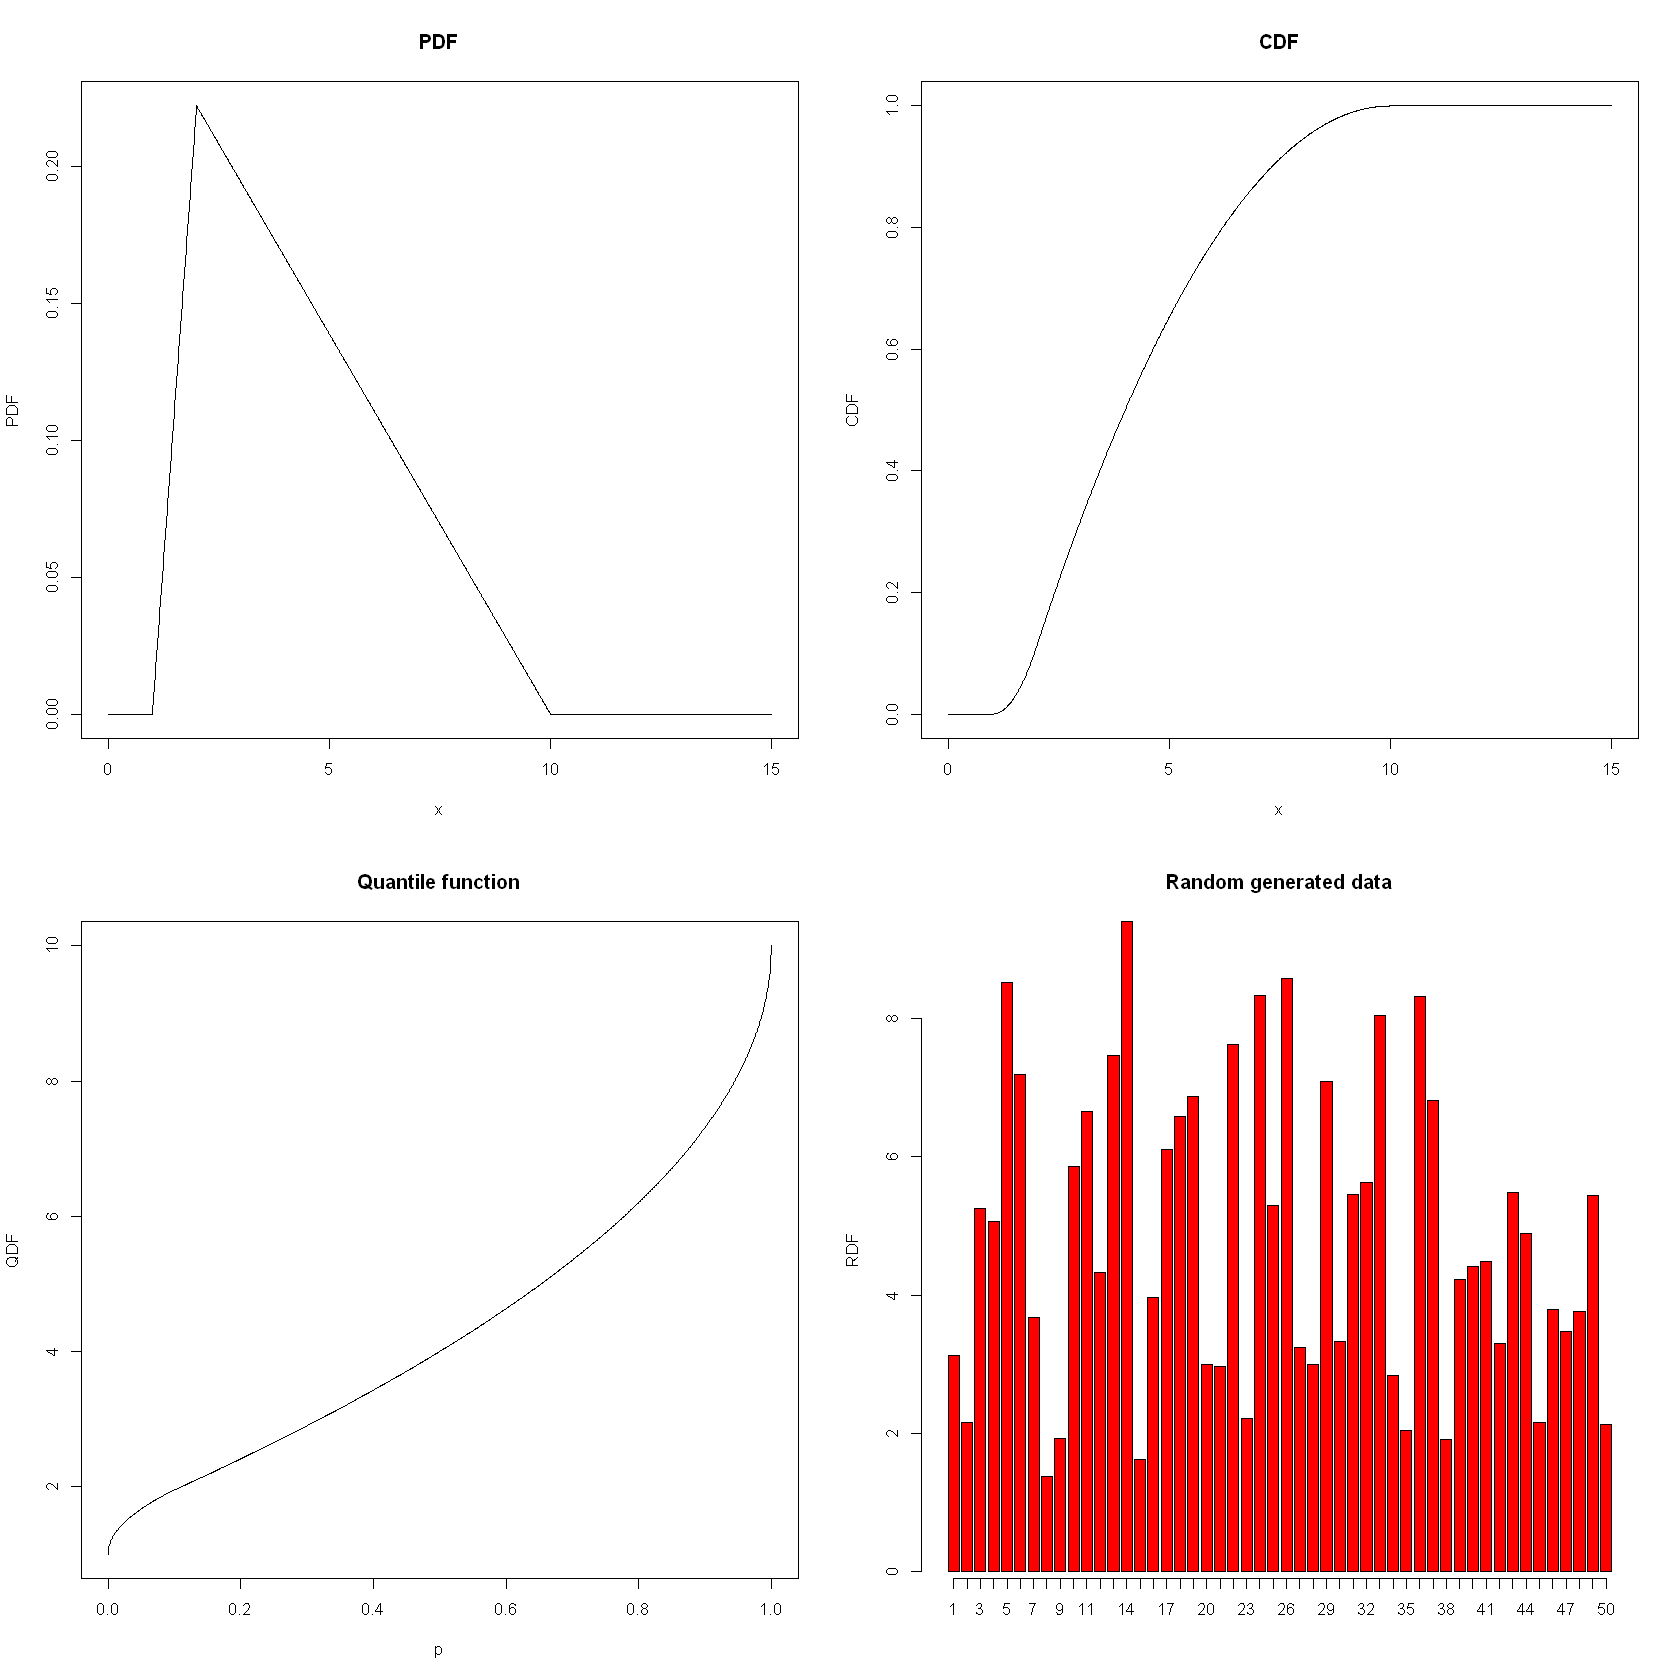

In [4]:
par(mfrow = c(2,2))
x <- seq(0,15,.01)
plot(x, sapply(x, dtriangle, a=1, b=10, c=2), type='l', main='PDF', ylab = "PDF")
plot(x, sapply(x, ptriangle, a=1, b=10, c=2), type='l', main='CDF', ylab = "CDF")
p <- seq(0,1,.001) 
plot(p, sapply(p, qtriangle, a=1, b=10, c=2), type='l', main='Quantile function', ylab = "QDF")
N = 50
rdm = barplot(rtriangle(50, a=1, b=10, c=2), main='Random generated data', ylab = "RDF", col="red")
axis(1,at=rdm,labels = 1:50)

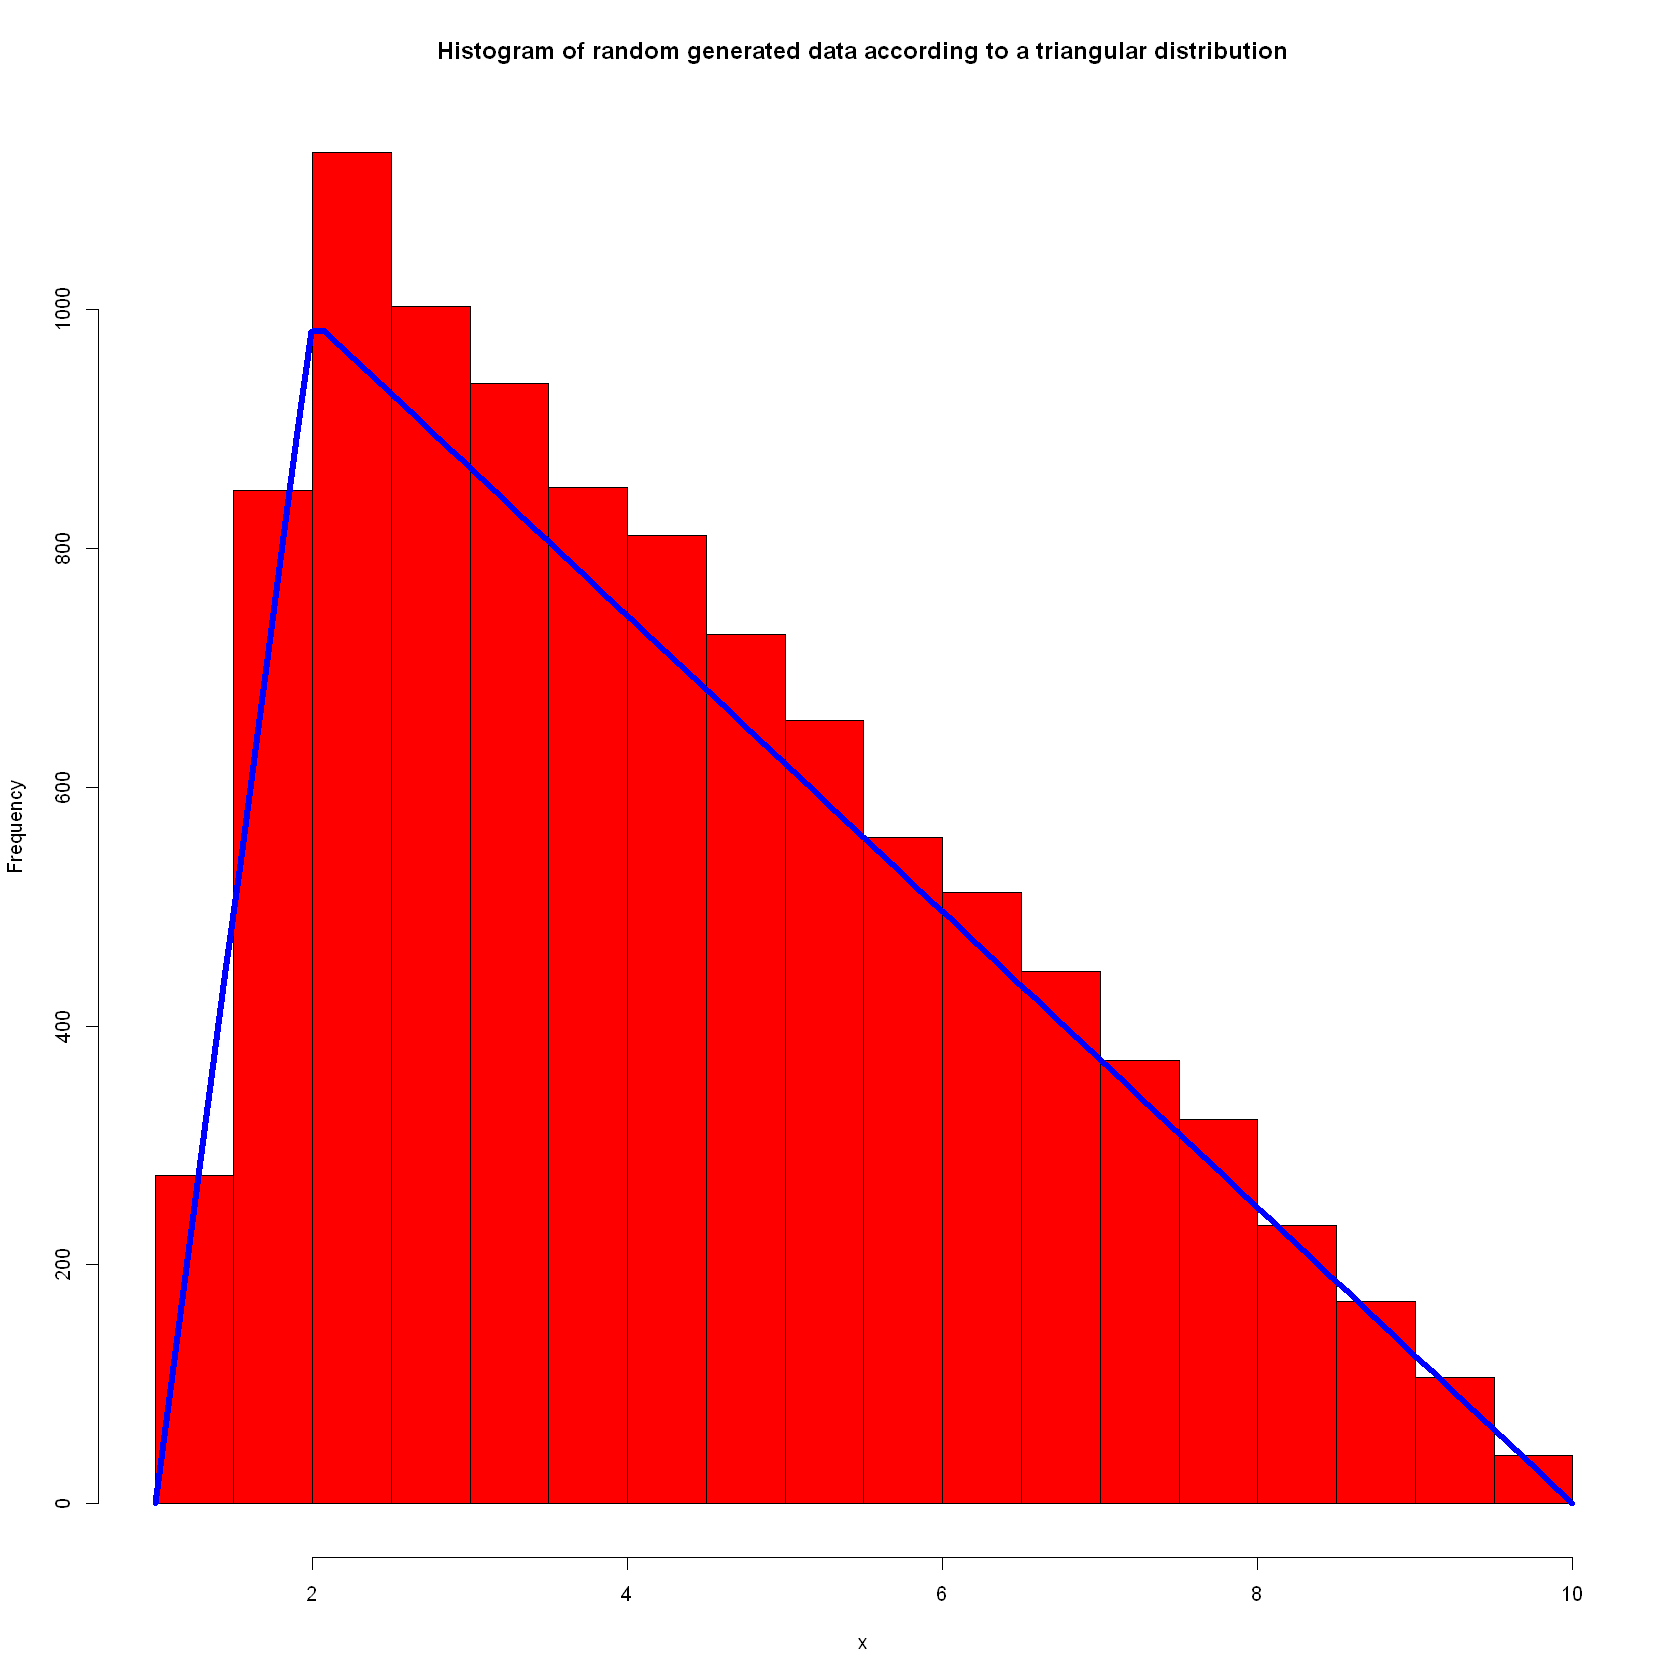

In [5]:
N<-1e4
rand_trian<-rtriangular(N=N, a=1, b=10, c=2)
bins<-20
hbin<-(max(rand_trian)-min(rand_trian))/bins
hist(rand_trian, breaks=bins, main="Histogram of random generated data according to a triangular distribution", xlab="x",col="red")
curve(N*hbin*sapply(x, dtriangle, a=1, b=10, c=2), add=TRUE,col="blue", lw=5)

## Exercise 2 - Markov's inequality<a class="anchor" id="ex2"></a>

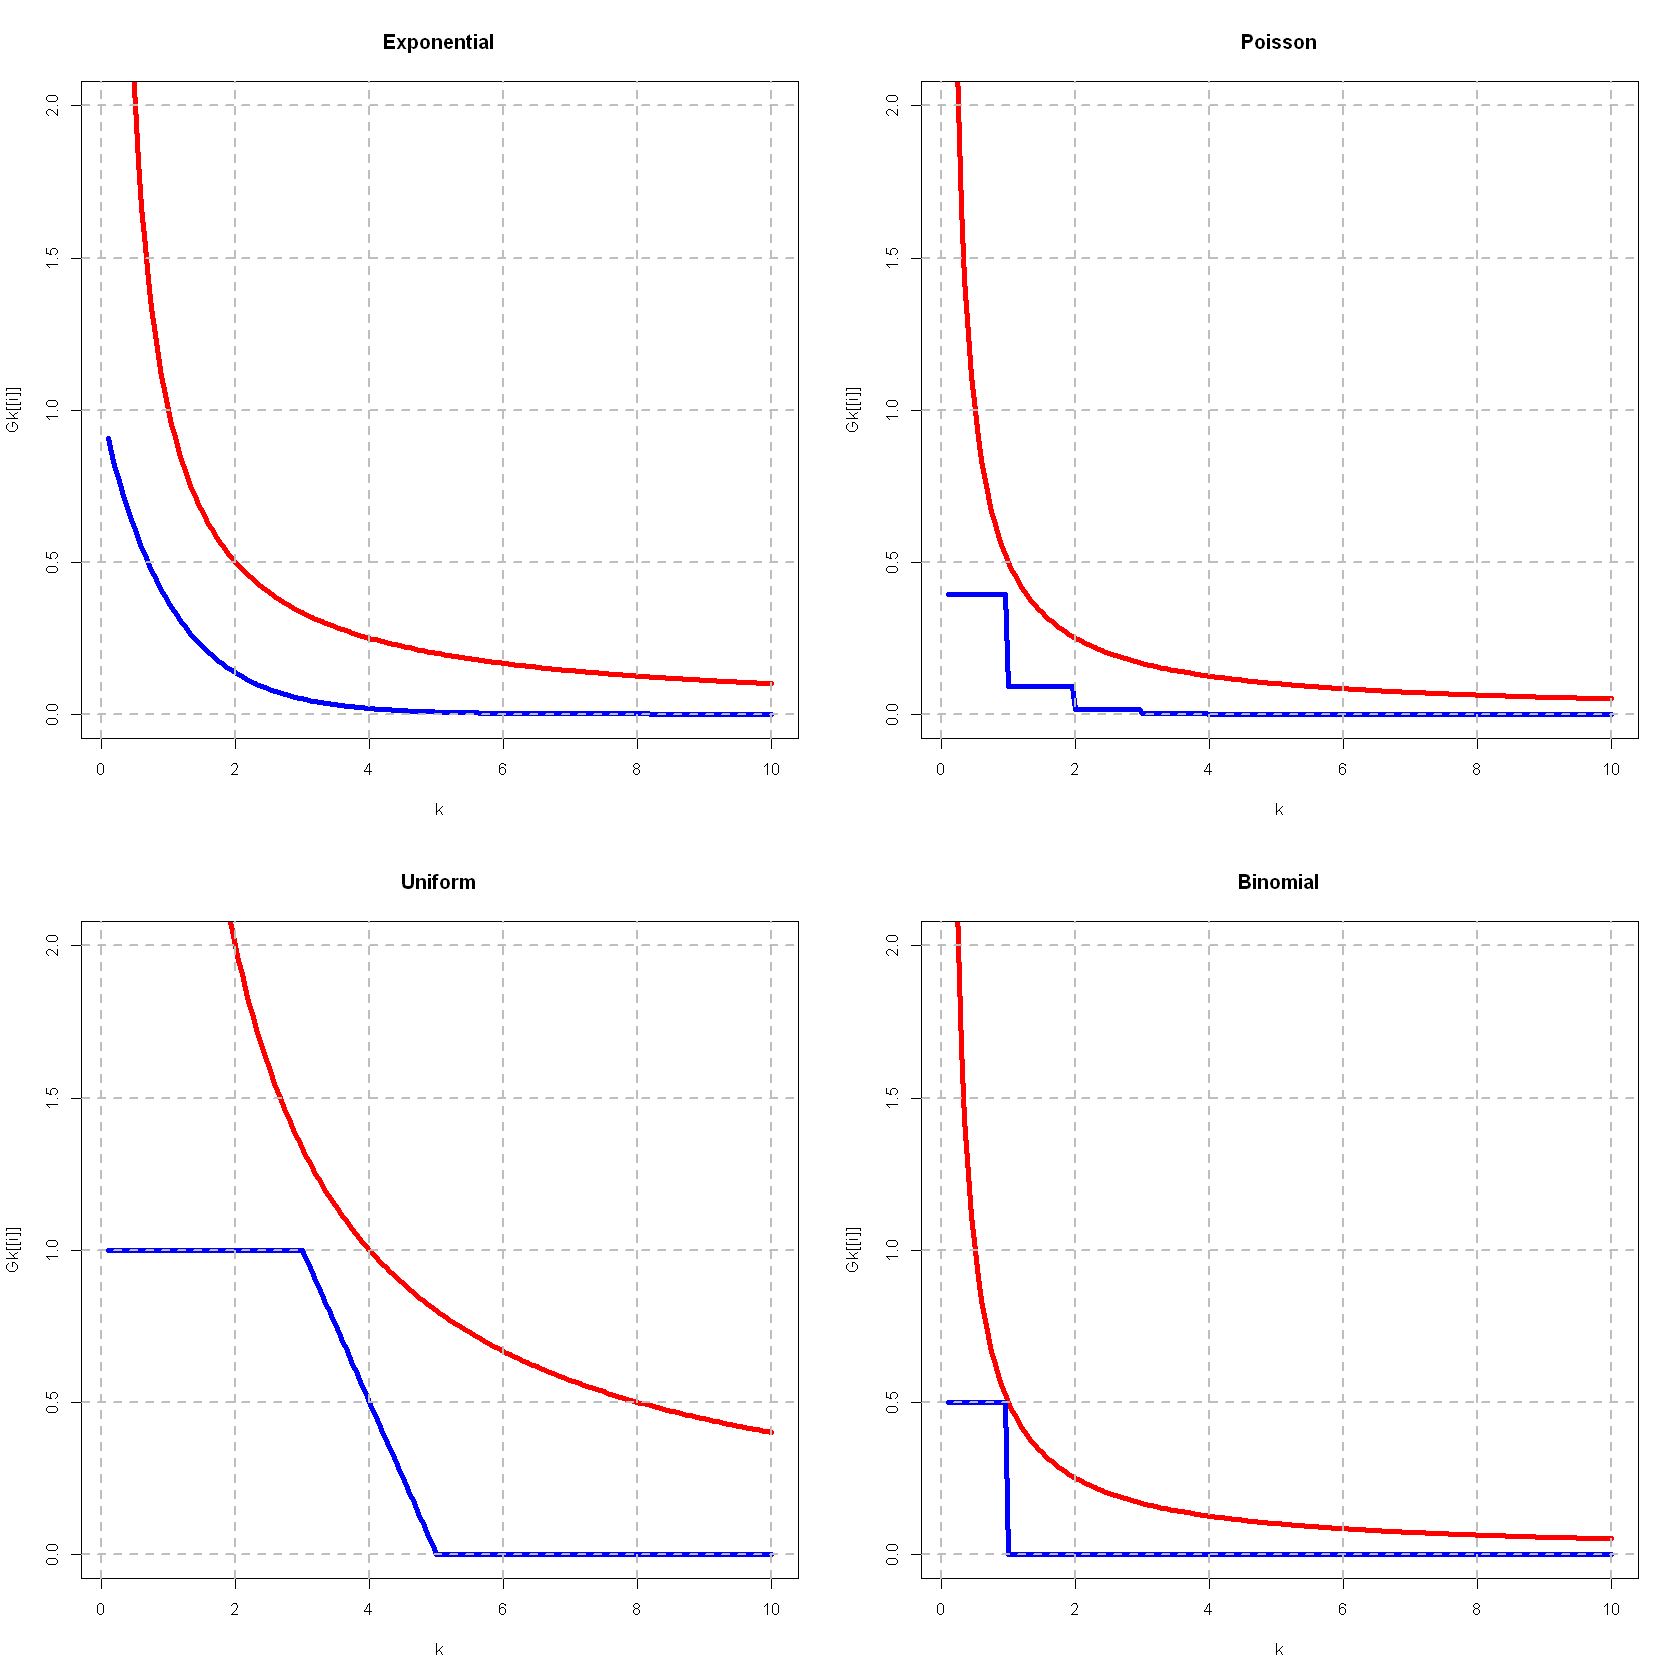

In [6]:
funcs<-c("pexp", "ppois", "punif", "pbinom")
functions<-c("Exponential", "Poisson", "Uniform", "Binomial")
# list of parameters
param<-list(c(1), c(.5), c(3,5), c(1,.5))
# expectation value for each distribution
Ex<-c(1/param[[1]], param[[2]], mean(param[[3]]), prod(param[[4]]))
k<-seq(.1,10,.05)
# using eList library to use list comprehensions
Gk<-List(for(i in 1:length(Ex)) Ex[i]/k )
# use do.call() function to call a function through the string of the name
Fk<-List(for(i in 1:length(funcs)) 1-do.call(funcs[i], c(param[[i]], list(q=k))))

# plot
par(mfrow = c(2,2))
for(i in 1:length(Fk)){
    plot(k, Gk[[i]], main=functions[i], type="l", lwd=4, col="red", ylim=c(0,2))#max(Gk[[i]])
    lines(k, Fk[[i]], type="l", lwd=4, col="blue", )
    grid(nx = NULL, ny = NULL,
         lty = 2,      # Grid line type
         col = "gray", # Grid line color
         lwd = 2)      # Grid line width
}

## Exercise 3 - Chebyshev's inequality<a class="anchor" id="ex3"></a>

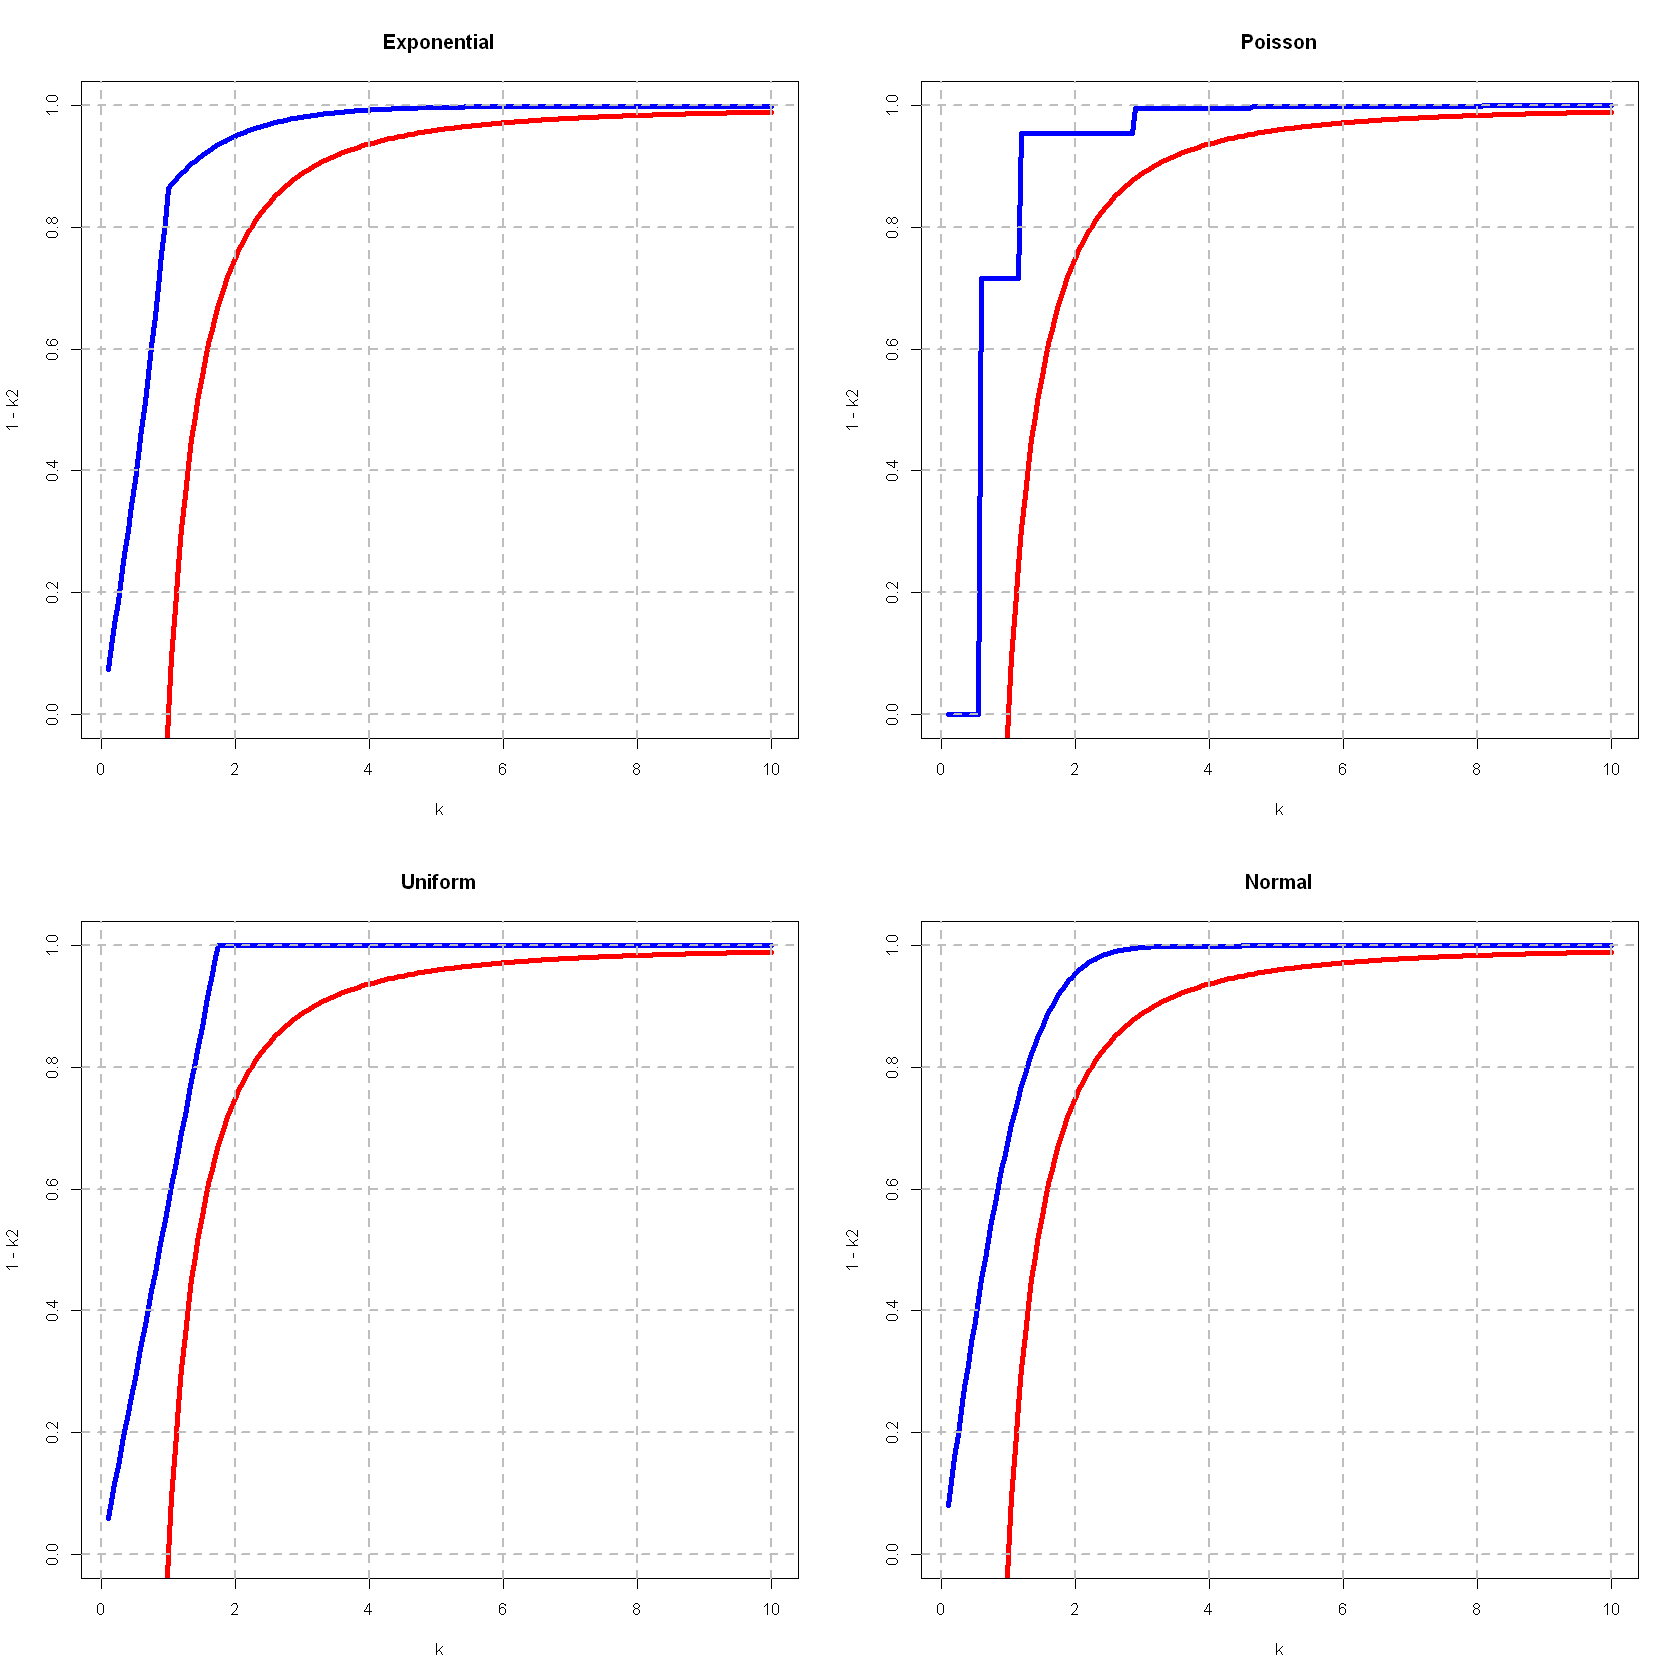

In [7]:
funcs<-c("pexp", "ppois", "punif", "pnorm")
functions<-c("Exponential", "Poisson", "Uniform", "Normal")
# list of parameters
param<-list(c(1), c(1/3), c(1-sqrt(2),1+sqrt(2)), c(3,5))
# expectation value for each distribution
Ex<-c(1/param[[1]],   param[[2]], mean(param[[3]]),                 param[[4]][1])
sg<-c(1/param[[1]],   sqrt(param[[2]]), (param[[3]][2]-param[[3]][1])/sqrt(12), param[[4]][2])
k<-seq(.1,10,.05)
# using eList library to use list comprehensions
k2<-1/k^2
# use do.call() function to call a function through the string of the name
Fk<-List(for(i in 1:length(funcs)) (do.call(funcs[i], c(param[[i]], list(q=Ex[i]+k*sg[i])))-do.call(funcs[i], c(param[[i]], list(q=Ex[i]-k*sg[i])))))

# plot
par(mfrow = c(2,2))
for(i in 1:length(Fk)){
    plot(k, 1-k2, main=functions[i], type="l", lwd=4, col="red", ylim=c(0,1))#max(Gk[[i]])
    lines(k, Fk[[i]], type="l", lwd=4, col="blue", )
    grid(nx = NULL, ny = NULL,
         lty = 2,      # Grid line type
         col = "gray", # Grid line color
         lwd = 2)      # Grid line width
}

## Exercise 4 - Six Boxes Toy Model: inference <a class="anchor" id="ex4"></a>

In [14]:
j<-0:5
n<-0
p<-rep(c(1/6),times=6)
P<-p
color<-c("start")
while(n!=-1){
    n<-readline(prompt="Enter 1 (white) or 0 (black) or -1 (exit): ")
    n<-as.integer(n)
    
    if(n==1){
        p<-(j/5 * p)/sum(j/5 * p)
    }
    else if(n==0){
        p<-((5-j)/5 * p)/sum((5-j)/5 * p)
    }
    else{
        break
    }
    P<-rbind(P, p)
    color<-append(color, ifelse(n==1, "W", "B"))
}

Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 1
Enter 1 (white) or 0 (black) or -1 (exit): 0
Enter 1 (white) or 0 (black) or -1 (exit): 0
Enter 1 (white) or 0 (black) or -1 (exit): 0
Enter 1 (w

In [15]:
extractions<-data.frame(P)
extractions<-cbind(extractions, color)
extractions<-cbind(extractions, c(0:(length(color)-1)))
colnames(extractions)<-c("H0","H1","H2","H3","H4","H5","color", "index")

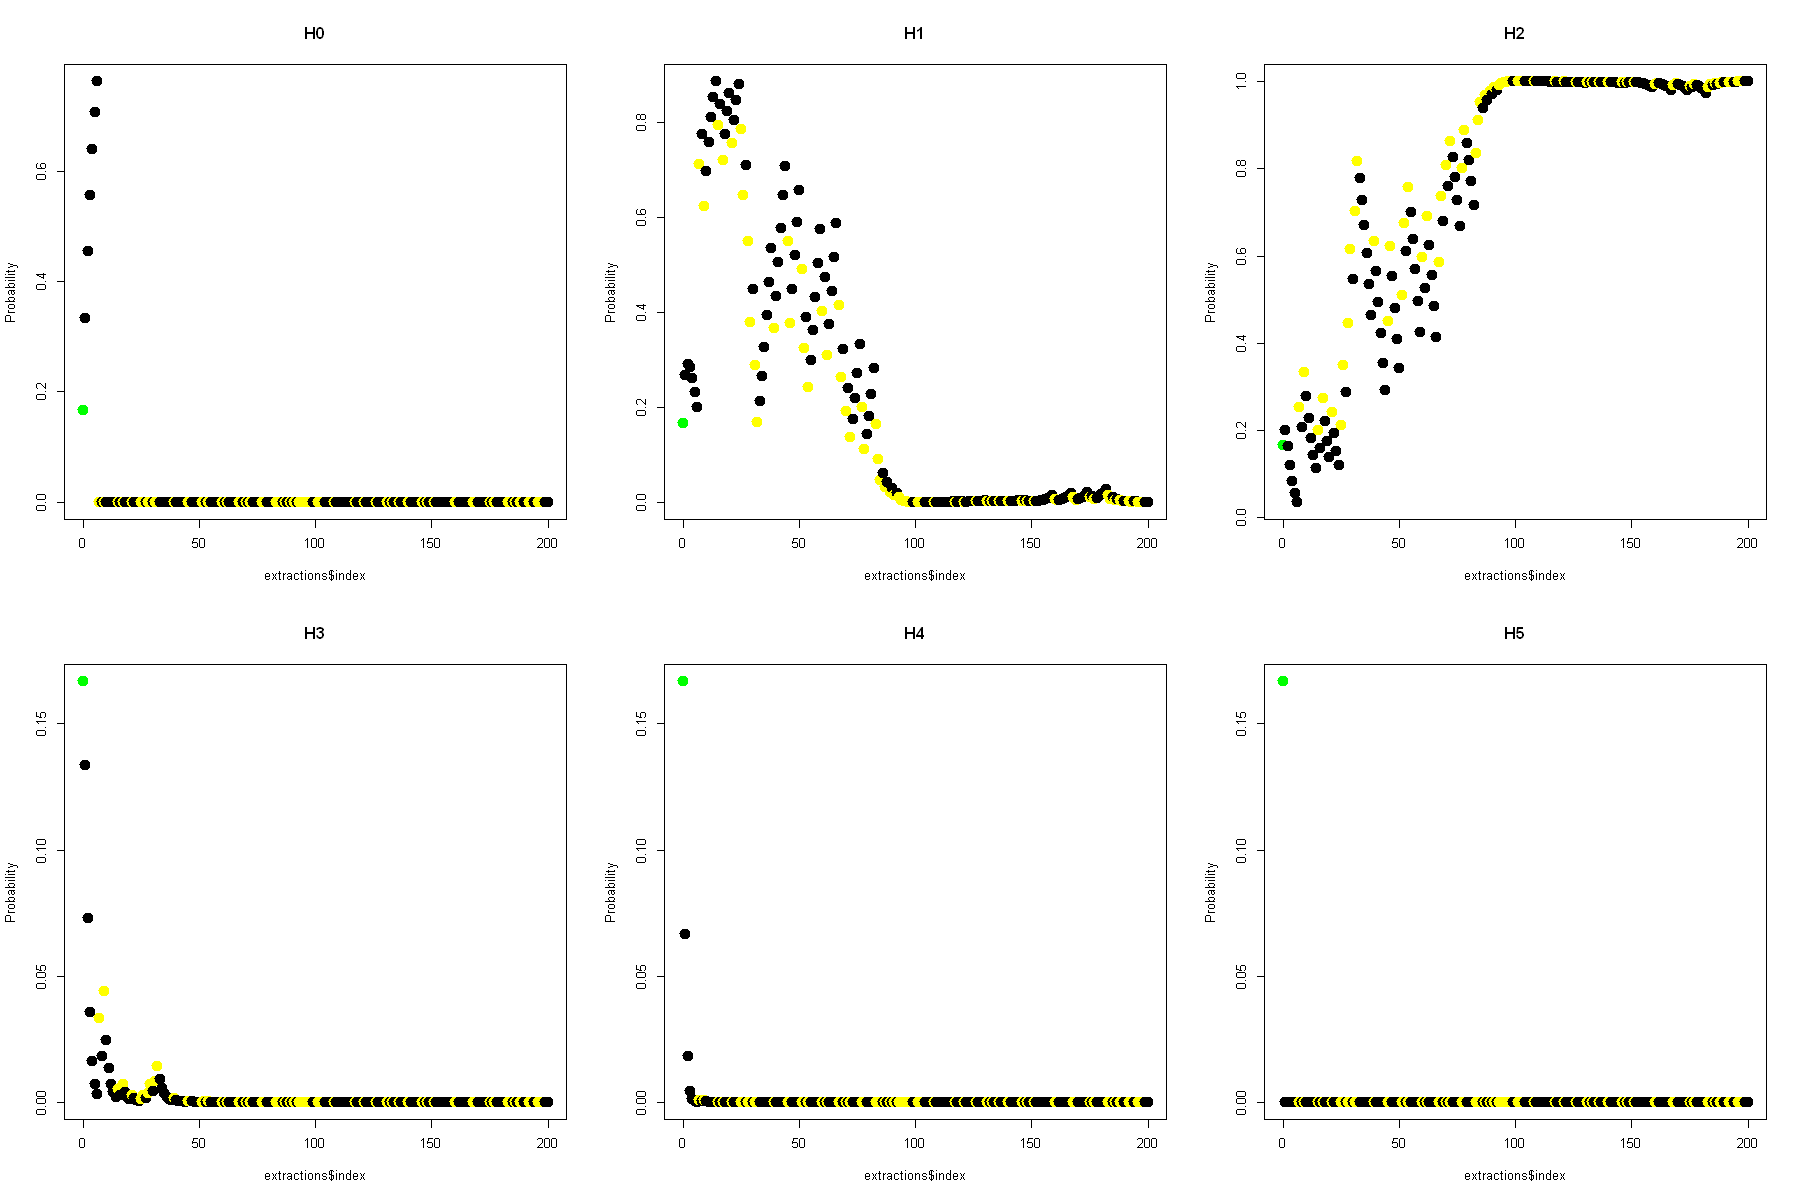

In [21]:
par(mfrow = c(2,3))

options(repr.plot.width = 15, repr.plot.height = 10)

plot(extractions$index, extractions$H0, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H0", ylab="Probability")
plot(extractions$index, extractions$H1, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H1", ylab="Probability")
plot(extractions$index, extractions$H2, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H2", ylab="Probability")
plot(extractions$index, extractions$H3, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H3", ylab="Probability")
plot(extractions$index, extractions$H4, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H4", ylab="Probability")
plot(extractions$index, extractions$H5, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H5", ylab="Probability")

## Exercise 5 - Six Boxes Toy Model: simulation <a class="anchor" id="ex5"></a>

In [22]:
BoxesNames<-c("H0", "H1", "H2","H3", "H4", "H5")
BoxesNumb<-seq(1,6,1)
BoxesCont<-List(for(i in 0:5) c(rep(c(1), i), rep(c(0), 5-i)))
selection<-sample(BoxesNumb, 1)
cat("Selected box: ", BoxesNames[selection])

Selected box:  H5

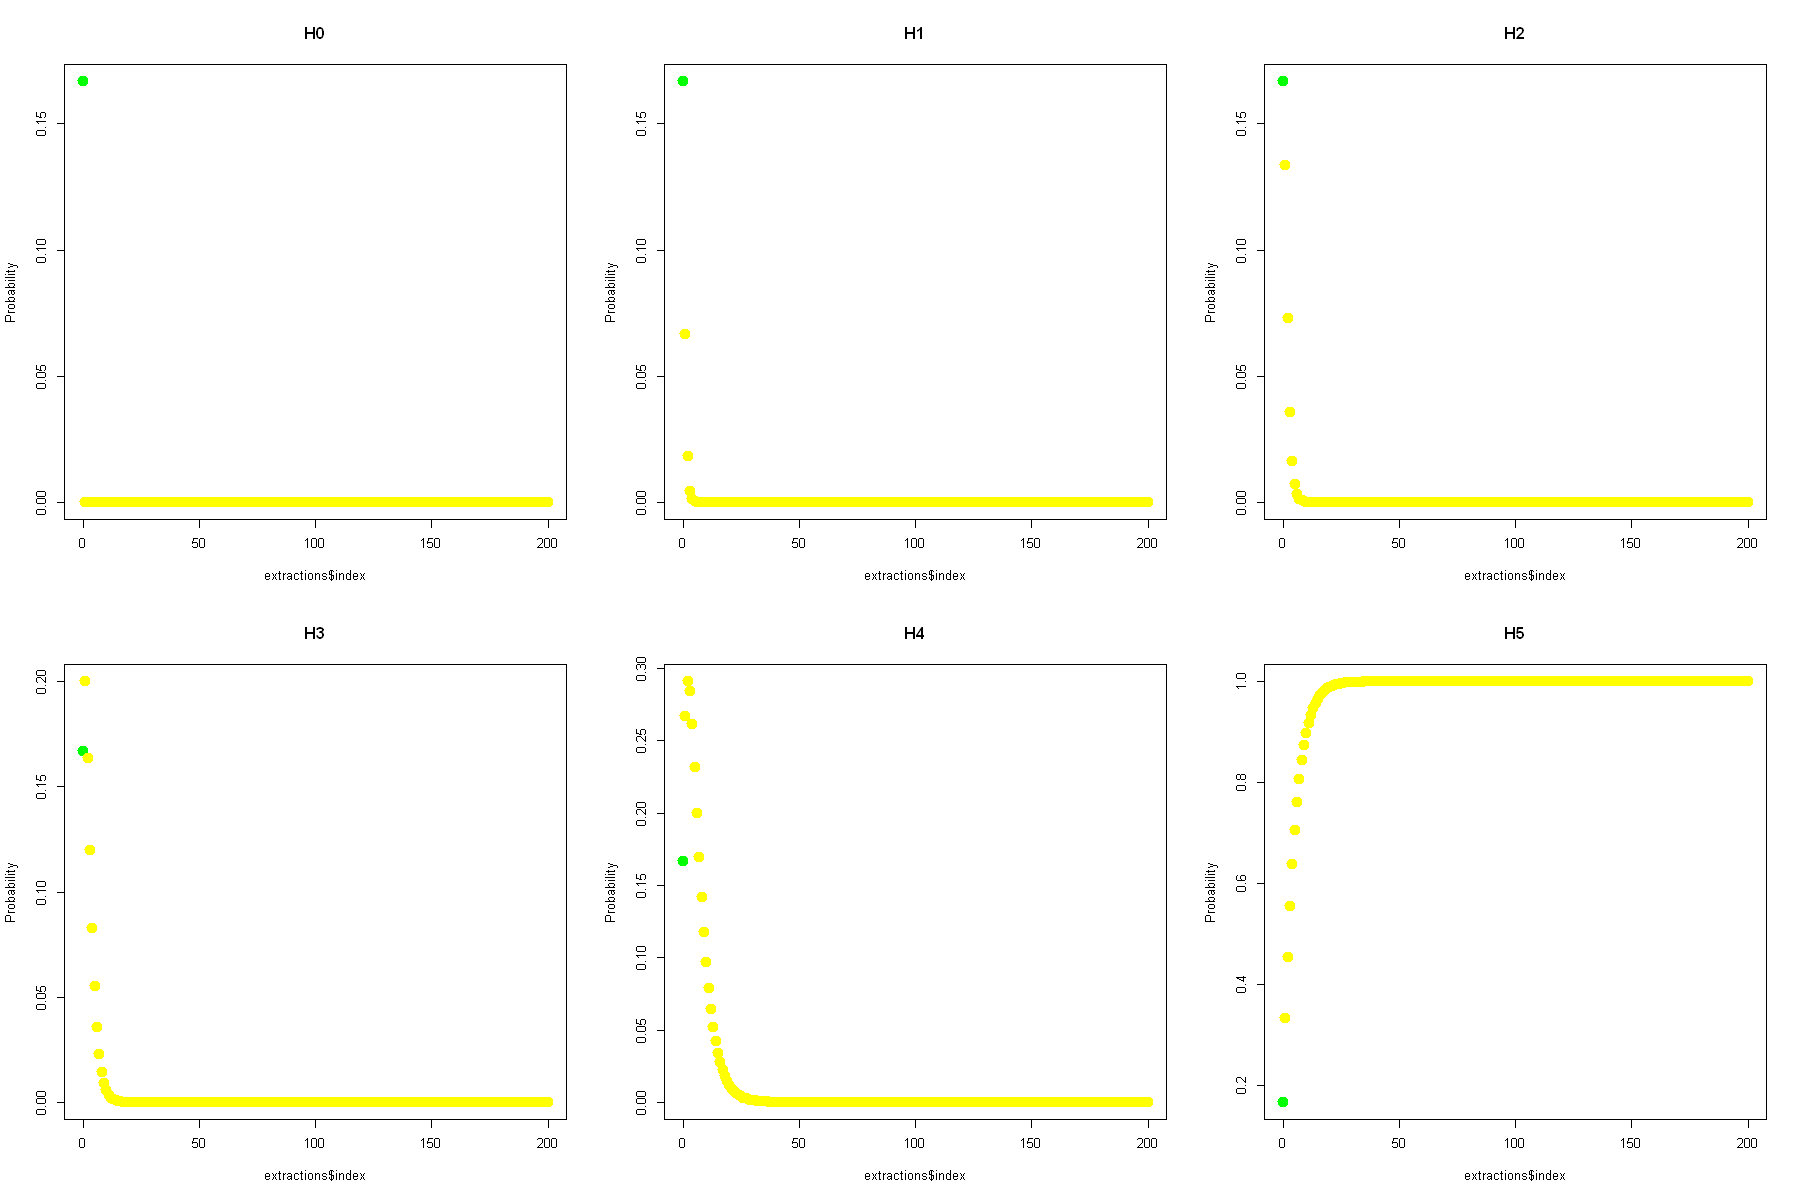

In [23]:
extraction<-sample(BoxesCont[[selection]], 200, replace=TRUE)

j<-0:5
n<-0
p<-rep(c(1/6),times=6)
P<-p
color<-c("start")
for(n in extraction){
    if(n==1){
        p<-(j/5 * p)/sum(j/5 * p)
    }
    else if(n==0){
        p<-((5-j)/5 * p)/sum((5-j)/5 * p)
    }
    else{
        break
    }
    P<-rbind(P, p)
    color<-append(color, ifelse(n==1, "W", "B"))
}

extractions<-data.frame(P)
extractions<-cbind(extractions, color)
extractions<-cbind(extractions, c(0:(length(color)-1)))
colnames(extractions)<-c("H0","H1","H2","H3","H4","H5","color", "index")

par(mfrow = c(2,3))

options(repr.plot.width = 15, repr.plot.height = 10)

plot(extractions$index, extractions$H0, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H0", ylab="Probability")
plot(extractions$index, extractions$H1, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H1", ylab="Probability")
plot(extractions$index, extractions$H2, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H2", ylab="Probability")
plot(extractions$index, extractions$H3, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H3", ylab="Probability")
plot(extractions$index, extractions$H4, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H4", ylab="Probability")
plot(extractions$index, extractions$H5, lwd=5, col=ifelse(extractions$color=="B", "black", ifelse(extractions$color=="W", "yellow", "green")), main="H5", ylab="Probability")

In [24]:
cat("Probability for each box:\n\n")
tail(extractions[c("H0", "H1", "H2","H3", "H4", "H5")], 1)

Probability for each box:



,H0,H1,H2,H3,H4,H5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
p.199,0,1.606938e-140,2.58225e-80,4.268252e-45,4.149516e-20,1
